# Örnek Model Eğitimi ve overfiting

Overfitting, makine öğrenmesi ve derin öğrenme modellerinde, modelin eğitim verisine aşırı uyum sağlaması sonucu eğitim setindeki gürültü veya rastlantısal özellikleri öğrenmesi durumudur.
- modelin eğitim verisinde çok iyi performans göstermesine rağmen, yeni ve görülmemiş veri üzerinde düşük performans göstermesine yol açar.
- Overfitting, modelin genelleme yeteneğini kaybetmesi anlamına gelir.

### Overfitting Nasıl Anlaşılır?

1. **Eğitim ve Doğrulama Hatalarının Karşılaştırılması:**
   - Eğitim verisindeki hata düşükken, doğrulama veya test verisindeki hata yüksekse overfitting olduğunu gösterebilir.
   - Eğitim doğruluğu zamanla artarken, doğrulama doğruluğu bir noktada durup hatta düşmeye başlıyorsa bu da overfitting’in bir işaretidir.

2. **Öğrenme Eğrileri:**
   - Eğitim ve doğrulama hatalarını zamanla (epoch'larla) çizerek modelin performansı izlenebilir. Eğitim hatası hızla azalırken, doğrulama hatası sabit kalıyor veya artıyorsa overfitting mevcuttur.

3. **Yüksek Model Karmaşıklığı:**
   - Aşırı karmaşık modeller (çok katmanlı derin ağlar veya çok yüksek dereceli polinomlar) daha fazla parametre içerdiğinden overfitting'e daha yatkındır.

4. **Çok İyi Eğitim Performansı:**
   - Eğitim setindeki başarı oranı %100’e çok yakınsa, bu modelin eğitim verisine fazla uyum sağladığını gösterebilir.

   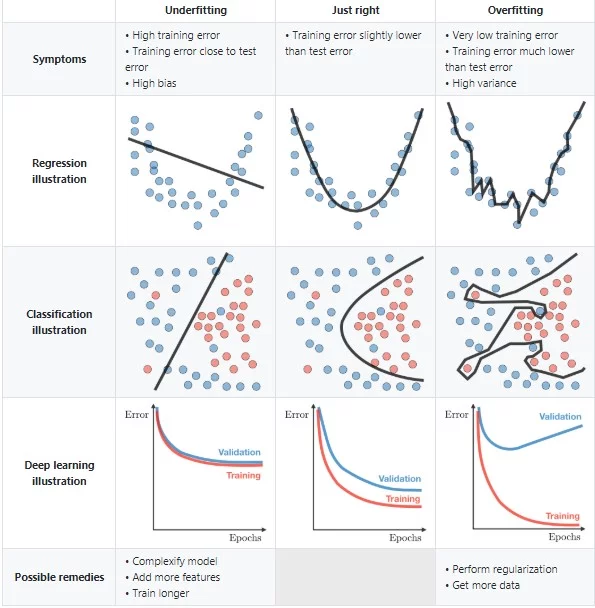

## Gerekli kütüphanelerin yüklenmesi

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

## Veri kümesini yükleyin

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


## Veri normalizasyonu

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Sınıf sayısını belirleyin
num_classes = len(np.unique(y_train))

In [ ]:
# Sınıf etiketlerini vektörlere dönüştürün
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Model oluşturma

In [ ]:
# Overfitting yapacak basit bir model oluşturalım
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli derleyin
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4120 - loss: 1.6215 - val_accuracy: 0.5779 - val_loss: 1.2297
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6303 - loss: 1.0522 - val_accuracy: 0.6616 - val_loss: 0.9681
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7037 - loss: 0.8410 - val_accuracy: 0.6802 - val_loss: 0.9173
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7601 - loss: 0.6890 - val_accuracy: 0.6978 - val_loss: 0.8962
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8099 - loss: 0.5449 - val_accuracy: 0.6998 - val_loss: 0.9108
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8612 - loss: 0.4108 - val_accuracy: 0.7092 - val_loss: 0.9579
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8990 - loss: 0.2948 - val_accuracy: 0.7015 - val_loss: 1.0566
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9318 - loss: 0.2092 

## Görselleştirme
Kayıp oranı validation da artarken, eğitimde düşmesi modelin overfit olduğunu gösterir.

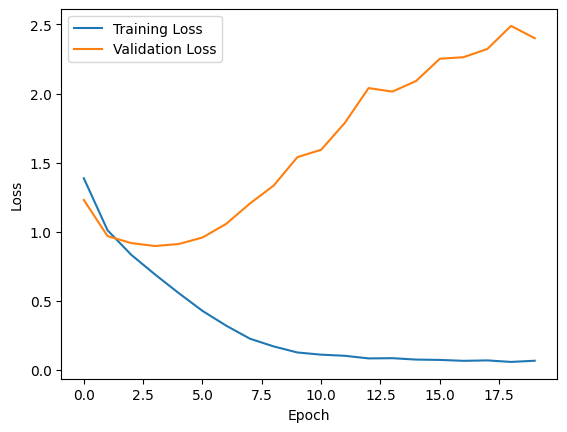

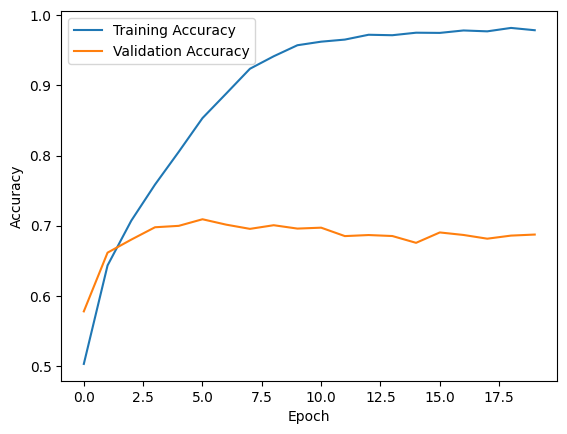

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting engelleme yöntemleri

### Droup out

Dropout, derin öğrenme modellerinde overfitting'i azaltmak ve modelin genelleme yeteneğini artırmak amacıyla kullanılan bir düzenlileştirme (regularization) tekniğidir.
Dropout, eğitim sırasında modelin bazı nöronlarını rastgele devre dışı bırakarak, ağın belirli nöronlara veya özelliklere aşırı bağımlı olmasını engeller. Bu, modelin daha sağlam ve genelleme yeteneği yüksek hale gelmesine yardımcı olur.

### Dropout Nasıl Çalışır?

- **Eğitim Aşaması:**
  - Eğitim sırasında, her ileri yayılım (forward pass) adımında, ağın her katmanındaki nöronlardan rastgele bir kısmı devre dışı bırakılır (yani, 0 olarak ayarlanır). Hangi nöronların devre dışı bırakılacağı, belirli bir olasılık (örneğin, %50) ile belirlenir.
  - Bu, her seferinde farklı bir alt ağın eğitilmesine yol açar, böylece modelin çeşitli örüntüleri öğrenmesi sağlanır.

- **Test Aşaması:**
  - Test aşamasında ise dropout uygulanmaz. Bunun yerine, modelin bütün nöronları kullanılır, ancak her bir nöronun çıktısı, eğitim sırasında kullanılan dropout oranına göre ölçeklendirilir. Bu, modelin test sırasında kararlı bir şekilde çalışmasını sağlar.

  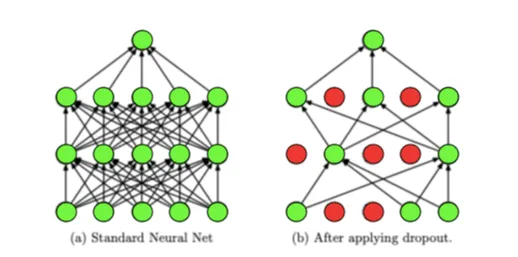




Aşağıdaki örnekte, dropout oranı %50 olarak ayarlanmıştır. Yani, her eğitim adımında nöronların %50'si rastgele devre dışı bırakılacaktır.

In [ ]:
# Dropout ekleyerek overfitting'i azaltmaya çalışalım
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli tekrar derleyin
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

### Early_stopping call back

Derin öğrenme modellerinin eğitim sürecinde overfitting’i önlemek için kullanılan bir düzenlileştirme (regularization) yöntemidir.
- Early stopping, modelin doğrulama setindeki performansını izleyerek, belirli bir noktadan sonra modelin eğitimini durdurur.
- Bu, modelin aşırı uyum sağladığı yani overfitting yapmaya başladığı durumları engeller.



- **Eğitim Süreci:**
  - Model eğitim sırasında her epoch’ta eğitim ve doğrulama verileri üzerinde değerlendirilir.
  - Early stopping, modelin doğrulama setindeki hatasını (veya doğruluğunu) izler. Eğer doğrulama hatası belirli bir süre boyunca iyileşmezse, yani modelin doğrulama performansı belirli bir sayıda epoch boyunca aynı kalır veya kötüleşirse, eğitim süreci durdurulur.

- **Patience Parametresi:**
  - Early stopping’in en önemli parametrelerinden biri olan "patience", doğrulama performansının iyileşmediği epoch sayısını belirler. Örneğin, `patience=5` olarak ayarlandığında, doğrulama hatası 5 epoch boyunca iyileşmezse eğitim durdurulur.

- **Mode Parametresi:**
  - "Mode" parametresi, izlenen metrikte bir azalma mı yoksa artış mı beklendiğini belirler. Örneğin, doğrulama kaybını azaltmaya çalışıyorsanız, mode "min" olarak ayarlanır; doğrulama doğruluğunu artırmaya çalışıyorsanız, mode "max" olarak ayarlanır.



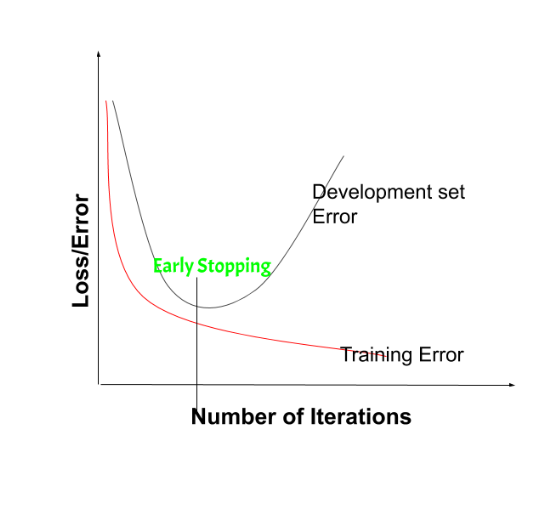


In [ ]:
# Early stopping callback ekleyin
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Modeli tekrar eğitin
history_1 = model_1.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3733 - loss: 1.6978 - val_accuracy: 0.5943 - val_loss: 1.1691
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5887 - loss: 1.1582 - val_accuracy: 0.6549 - val_loss: 0.9934
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6502 - loss: 0.9938 - val_accuracy: 0.6648 - val_loss: 0.9422
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6907 - loss: 0.8832 - val_accuracy: 0.6770 - val_loss: 0.9128
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7206 - loss: 0.7906 - val_accuracy: 0.7013 - val_loss: 0.8683
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7482 - loss: 0.7227 - val_accuracy: 0.7141 - val_loss: 0.8351
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7760 - loss: 0.6429 - val_accuracy: 0.7166 - val_loss: 0.8313
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7957 - loss: 0.5832 

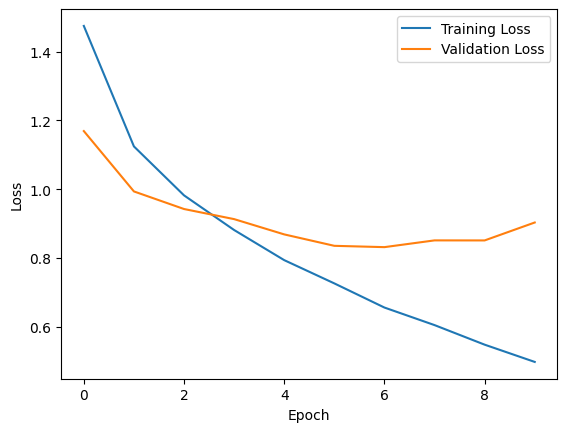

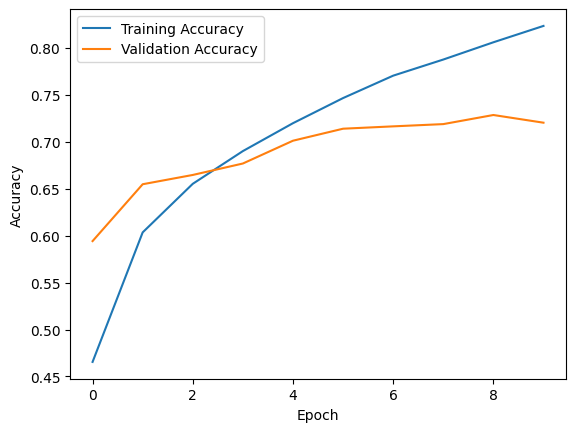

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Eğitim ve doğrulama doğruluklarını tekrar çizdirin
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Veri artırımı

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma ayarlarını belirleyin
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
# Veri artırma ile modeli eğitin
history_2 = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6178 - loss: 1.3279 - val_accuracy: 0.6601 - val_loss: 1.0761
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6783 - loss: 0.9333 - val_accuracy: 0.7020 - val_loss: 0.9014
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7025 - loss: 0.8636 - val_accuracy: 0.7028 - val_loss: 0.9117


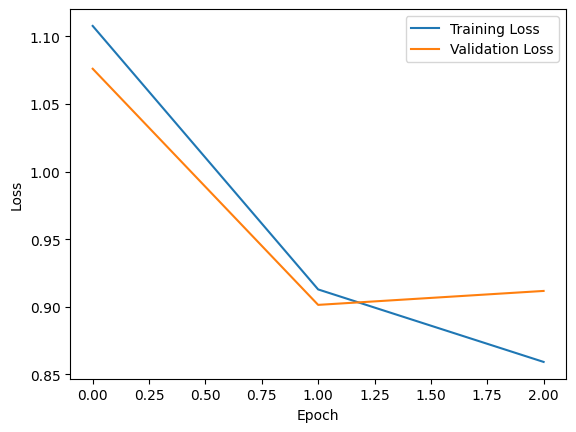

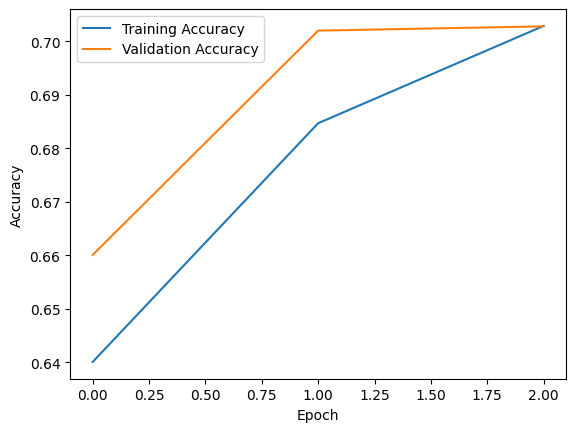

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını tekrar çizdirin
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()